In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
pd.set_option('display.max_columns', 10)

In [3]:
data = pd.read_csv('../data/clean_data/data_v1.csv', index_col=0)
data.head()

,age,job_industry_recode,school_enroll_lastweek,employment,fam_size,...,fam_otc_med_costs,fam_rent_val,fips,state,state.1
1,67,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,...,0,0,ME,4,23
2,74,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,...,60,0,ME,4,23
3,66,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,...,0,0,ME,3,23
4,68,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,...,0,0,ME,3,23
5,52,"Not in universe, or children",No,0,1,...,0,0,ME,3,23


In [4]:
pd.set_option("display.max_columns", None)

In [5]:
data = data[data['poverty_ratio'] != 'NOT IN POVERTY UNIVERSE']
data.head()

,age,job_industry_recode,school_enroll_lastweek,employment,fam_size,full_time_work,full_part_school,highest_education,hs_col_unenrolled,weekly_earnings,hourly_work_yn,hours_worked,labor_force_recode,marital_status,main_job_industry_recode,sex,union_contract_avail,union_member_yn,reason_unemployed,weeks_unemployed,ft_pt_unem,age_recode_gt15,federal_gross_income_adj,need_childcare,hh_childcare_val,hh_childcare,health_insurance_ly,company_offer_insurance,poverty_ratio,family_earn_ly,fam_id,fam_med_costs,fam_outofpocket_med_costs,fam_otc_med_costs,fam_rent_val,fips,state,state.1
1,67,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,Some College But No Degree,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Never married,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,0,Niu,-1,Niu,Coverage for all of year,NIU,BELOW POVERTY LEVEL,0,1,0,0,0,0,ME,4,23
2,74,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Divorced,"Not in universe, or children",Male,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,70 to 74 years,9,Niu,-1,Niu,Coverage for all of year,NIU,BELOW POVERTY LEVEL,0,1,0,60,60,0,ME,4,23
3,66,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Widowed,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,0,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
4,68,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Widowed,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,2400,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
5,52,"Not in universe, or children",No,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Marr-civ sp present,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,50 to 54 years,47828,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,42000,1,50,1370,0,0,ME,3,23


Columns that are 0/1:
sex
employment
full_time_work
full_part_school

columns that are categorical
job industry recode
age_recode_gt15
highest education
marital status
ft_pt_unem
fips
labor_force_recode
sex

multinomial columns:
federal_gross_income_adj
fam_size
age
fam_med_costs
weeks_unemployed
hours_worked

target column = poverty

### Multinomial NB Data Prep

In [6]:
data_multinomial_cols = ['federal_gross_income_adj', 'fam_size', 'age', 'fam_med_costs', 'weeks_unemployed', 'hours_worked', 'poverty_ratio']
data_multinomial = data.loc[:,data_multinomial_cols]
data_multinomial.head()

,federal_gross_income_adj,fam_size,age,fam_med_costs,weeks_unemployed,hours_worked,poverty_ratio
1,0,0,67,0,0,0,BELOW POVERTY LEVEL
2,9,0,74,0,0,0,BELOW POVERTY LEVEL
3,0,1,66,0,0,0,150 AND ABOVE THE POVERTY LEVEL
4,2400,1,68,0,0,0,150 AND ABOVE THE POVERTY LEVEL
5,47828,1,52,50,0,0,150 AND ABOVE THE POVERTY LEVEL


In [7]:
data_multinomial.isna().sum()

federal_gross_income_adj    0
fam_size                    0
age                         0
fam_med_costs               0
weeks_unemployed            0
hours_worked                0
poverty_ratio               0
dtype: int64

In [8]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x = data_multinomial.drop('poverty_ratio', axis = 1)
x = x.clip(lower = 0)
y = data_multinomial['poverty_ratio']
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=1111,
    test_size = 0.2
)
X_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

In [9]:
y_train_rus.value_counts()

poverty_ratio
100 - 124 PERCENT OF THE POVERTY LEVEL    4460
125 - 149 PERCENT OF THE POVERTY LEVEL    4460
150 AND ABOVE THE POVERTY LEVEL           4460
BELOW POVERTY LEVEL                       4460
Name: count, dtype: int64

In [10]:
X_train_rus

,federal_gross_income_adj,fam_size,age,fam_med_costs,weeks_unemployed,hours_worked
103888,0,1,5,0,0,0
89741,0,1,14,0,0,0
71415,0,3,2,500,0,0
114301,0,0,69,60,0,0
93094,0,1,4,0,0,0
...,...,...,...,...,...,...
101608,0,1,10,300,0,0
53898,0,0,67,0,0,0
118269,650,0,35,200,0,14
114257,0,1,7,0,0,0


In [11]:
x_test

,federal_gross_income_adj,fam_size,age,fam_med_costs,weeks_unemployed,hours_worked
60456,0,1,11,150,0,0
61253,312940,1,38,3500,0,16
40491,115103,1,34,805,0,50
113407,44020,0,32,0,0,40
79087,0,1,1,1000,0,0
...,...,...,...,...,...,...
15647,50002,2,23,300,0,36
59576,0,1,45,1270,0,48
14999,0,1,0,330,0,0
98278,22000,1,35,0,0,45


In [12]:
y_test.value_counts()

poverty_ratio
150 AND ABOVE THE POVERTY LEVEL           23509
BELOW POVERTY LEVEL                        3346
125 - 149 PERCENT OF THE POVERTY LEVEL     1217
100 - 124 PERCENT OF THE POVERTY LEVEL     1100
Name: count, dtype: int64

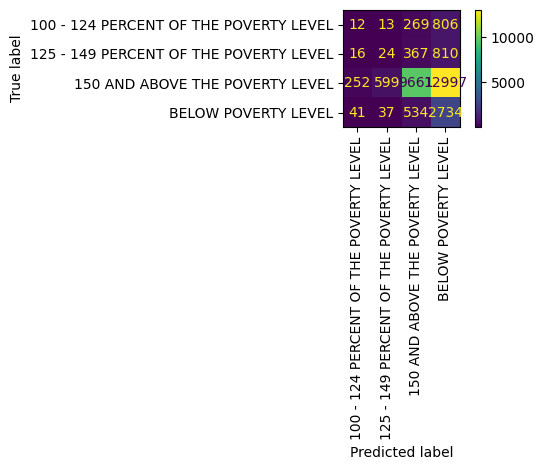

In [13]:
MNB = MultinomialNB()
MNB.fit(X_train_rus, y_train_rus)
Multinomial_Prediction = MNB.predict(x_test)
Multinomial_matrix = confusion_matrix(y_test, Multinomial_Prediction)
#matrix_MNB = ConfusionMatrixDisplay.from_estimator(confusion_matrix=Multinomial_matrix,
#                                     display_labels=MNB.classes_, xticks_rotation='vertical'
#)
ConfusionMatrixDisplay.from_estimator(MNB, x_test, y_test, xticks_rotation='vertical')
plt.tight_layout()
plt.savefig('../site_pages/plots/MNBCM.png')
Multinomial_accuracy = MNB.score(x_test, y_test)

In [14]:
Multinomial_accuracy

0.4261277937748526

### Categorical NB Data Prep

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
data_categorical_cols = ['job_industry_recode', 'age_recode_gt15', 'highest_education', 'marital_status', 'ft_pt_unem', 'fips', 'labor_force_recode', 'sex']
data_categorical = data.loc[:,data_categorical_cols]
le = LabelEncoder()
for col in data_categorical_cols:
    data_categorical[col] = le.fit_transform(data_categorical[col])
data_categorical['poverty_ratio'] = data['poverty_ratio']
data_categorical.head()

,job_industry_recode,age_recode_gt15,highest_education,marital_status,ft_pt_unem,fips,labor_force_recode,sex,poverty_ratio
1,17,14,16,4,2,21,1,0,BELOW POVERTY LEVEL
2,17,15,12,0,2,21,1,1,BELOW POVERTY LEVEL
3,17,14,12,6,2,21,1,0,150 AND ABOVE THE POVERTY LEVEL
4,17,14,12,6,2,21,1,0,150 AND ABOVE THE POVERTY LEVEL
5,17,10,12,2,2,21,1,0,150 AND ABOVE THE POVERTY LEVEL


In [17]:
x = data_categorical.drop('poverty_ratio', axis = 1)
y = data_categorical['poverty_ratio']
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=1111,
    test_size = 0.2
)
X_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

In [18]:
X_train_rus

,job_industry_recode,age_recode_gt15,highest_education,marital_status,ft_pt_unem,fips,labor_force_recode,sex
103888,17,17,10,4,1,43,0,0
89741,17,17,10,4,1,18,0,0
71415,17,17,10,4,1,9,0,0
114301,17,14,16,0,2,32,1,1
93094,17,17,10,4,1,36,0,1
...,...,...,...,...,...,...,...,...
19195,17,1,0,4,2,38,1,1
11626,17,3,1,4,2,34,1,1
50205,17,17,10,4,1,8,0,1
12311,17,17,10,4,1,34,0,1


In [19]:
x_test

,job_industry_recode,age_recode_gt15,highest_education,marital_status,ft_pt_unem,fips,labor_force_recode,sex
60456,17,17,10,4,1,27,0,1
61253,4,7,9,2,0,27,5,0
40491,9,6,9,2,0,12,5,1
113407,16,6,9,4,0,32,5,1
79087,17,17,10,4,1,42,0,0
...,...,...,...,...,...,...,...,...
15647,12,4,7,3,0,34,5,0
59576,11,9,15,2,0,49,5,0
14999,17,17,10,4,1,34,0,0
98278,23,7,7,4,0,43,5,0


In [20]:
y_train_rus.value_counts()

poverty_ratio
100 - 124 PERCENT OF THE POVERTY LEVEL    4460
125 - 149 PERCENT OF THE POVERTY LEVEL    4460
150 AND ABOVE THE POVERTY LEVEL           4460
BELOW POVERTY LEVEL                       4460
Name: count, dtype: int64

In [21]:
y_test.value_counts()

poverty_ratio
150 AND ABOVE THE POVERTY LEVEL           23509
BELOW POVERTY LEVEL                        3346
125 - 149 PERCENT OF THE POVERTY LEVEL     1217
100 - 124 PERCENT OF THE POVERTY LEVEL     1100
Name: count, dtype: int64

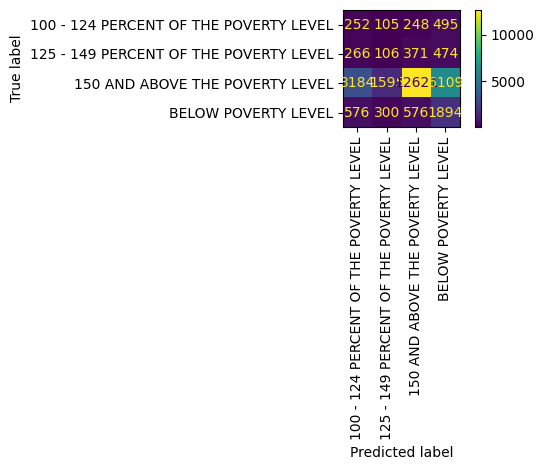

In [22]:
CNB = CategoricalNB()
CNB.fit(X_train_rus, y_train_rus)
Categorical_Prediction = CNB.predict(x_test)
Categorical_accuracy = CNB.score(x_test, y_test)
ConfusionMatrixDisplay.from_estimator(CNB, x_test, y_test, xticks_rotation='vertical')
plt.tight_layout()
plt.savefig('../site_pages/plots/CNBCM.png')

In [23]:
print(Categorical_accuracy)

0.5098382010146716


### Bernoulli NB Data Prep

In [24]:
data_bernoulli_cols = ['sex', 'employment', 'full_time_work', 'full_part_school', 'poverty_ratio']
data_bernoulli = data.loc[:, data_bernoulli_cols]
data_bernoulli = data_bernoulli.query('employment < 2')
data_bernoulli = data_bernoulli.query('full_time_work < 2')
data_bernoulli = data_bernoulli.query('full_part_school < 2')
data_bernoulli['sex'] = le.fit_transform(data_bernoulli['sex'])


In [25]:
x = data_bernoulli.drop('poverty_ratio', axis = 1)
y = data_bernoulli['poverty_ratio']
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=1111,
    test_size = 0.2
)
X_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

In [26]:
y_train_rus.value_counts()

poverty_ratio
100 - 124 PERCENT OF THE POVERTY LEVEL    4275
125 - 149 PERCENT OF THE POVERTY LEVEL    4275
150 AND ABOVE THE POVERTY LEVEL           4275
BELOW POVERTY LEVEL                       4275
Name: count, dtype: int64

In [27]:
X_train_rus

,sex,employment,full_time_work,full_part_school
18475,1,0,0,0
94035,0,0,0,0
97658,1,0,0,0
48527,0,0,0,0
40925,1,0,0,0
...,...,...,...,...
25089,0,0,0,1
122638,1,0,0,0
91298,0,0,0,1
121554,0,0,0,0


In [28]:
x_test

,sex,employment,full_time_work,full_part_school
33914,1,0,0,0
60226,0,0,0,0
33414,0,0,0,0
49028,0,1,1,0
97457,1,0,0,0
...,...,...,...,...
139168,1,1,0,0
78776,0,0,0,0
61639,1,0,0,0
56042,0,1,1,0


In [29]:
y_test.value_counts()

poverty_ratio
150 AND ABOVE THE POVERTY LEVEL           22949
BELOW POVERTY LEVEL                        3213
125 - 149 PERCENT OF THE POVERTY LEVEL     1142
100 - 124 PERCENT OF THE POVERTY LEVEL     1128
Name: count, dtype: int64

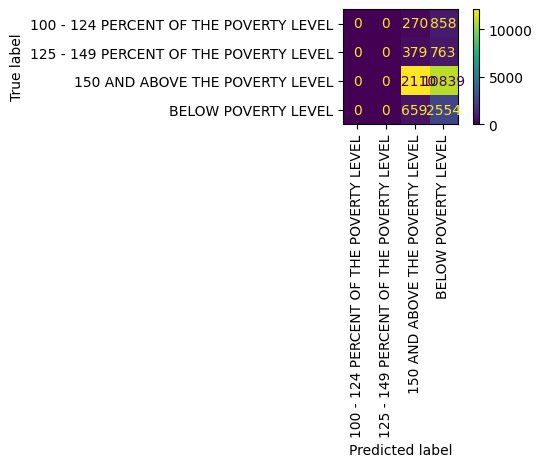

In [30]:
BNB = BernoulliNB()
BNB.fit(X_train_rus, y_train_rus)
BernoulliPrediction = BNB.predict(x_test)
ConfusionMatrixDisplay.from_estimator(BNB, x_test, y_test, xticks_rotation='vertical')
plt.tight_layout()
plt.savefig('../site_pages/plots/BNBCM.png')
Bernoulli_accuracy = BNB.score(x_test, y_test)

In [31]:
Bernoulli_accuracy

0.5157568936409679